# PCA using Python (scikit-learn)

#### Load Iris dataset

In [1]:
import pandas as pd

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# load dataset into pandas DataFrame

df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [4]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


***

#### Standarize the Data

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
feature = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Seperate out the feature
x = df.loc[:, feature].values

# Seperating out the target
y = df.loc[:, ['target']].values

# Standadizing the feature
x = StandardScaler().fit_transform(x)

#### PCA Projection to 2D

Converting from 4 columns into 2 dimensions

In [13]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [26]:
principalDf.head()

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [27]:
finalDf = pd.concat([principalDf, df[['target']]], axis=1)

In [28]:
finalDf.head()

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


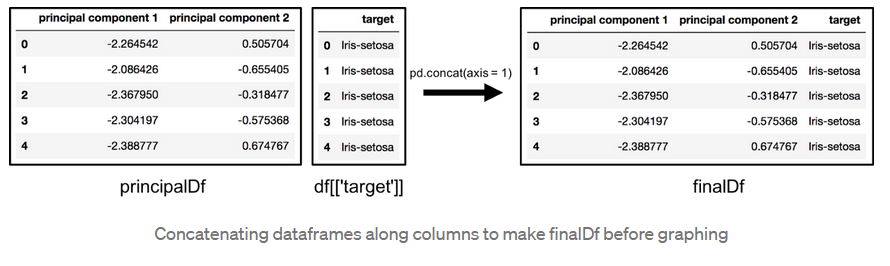

***

#### Visualize 2D projection

This section is just plotting 2 dimensional data. Notice on the graph below that the classes seem well separated from each other.

In [29]:
import matplotlib.pyplot as plt

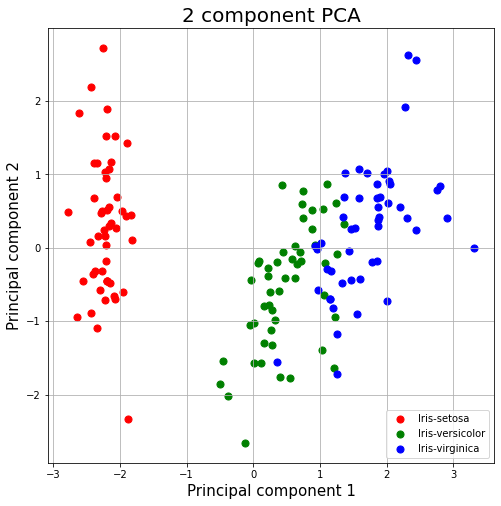

In [30]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal component 1', fontsize = 15)
ax.set_ylabel('Principal component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#### Explain variance

In [31]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

***

### PCA to speed-up machine learning

#### Download and load data

In [32]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

***

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60